# Imporitng Dependencies

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline # appear on the notebook

UsageError: unrecognized arguments: # appear on the notebook


In [12]:
# Get the data
housing=pd.read_csv('housing.csv' , index_col = None)

# Taking A Quick Look To The DataStructure

In [13]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3C86D5B88>,
      dtype=object)

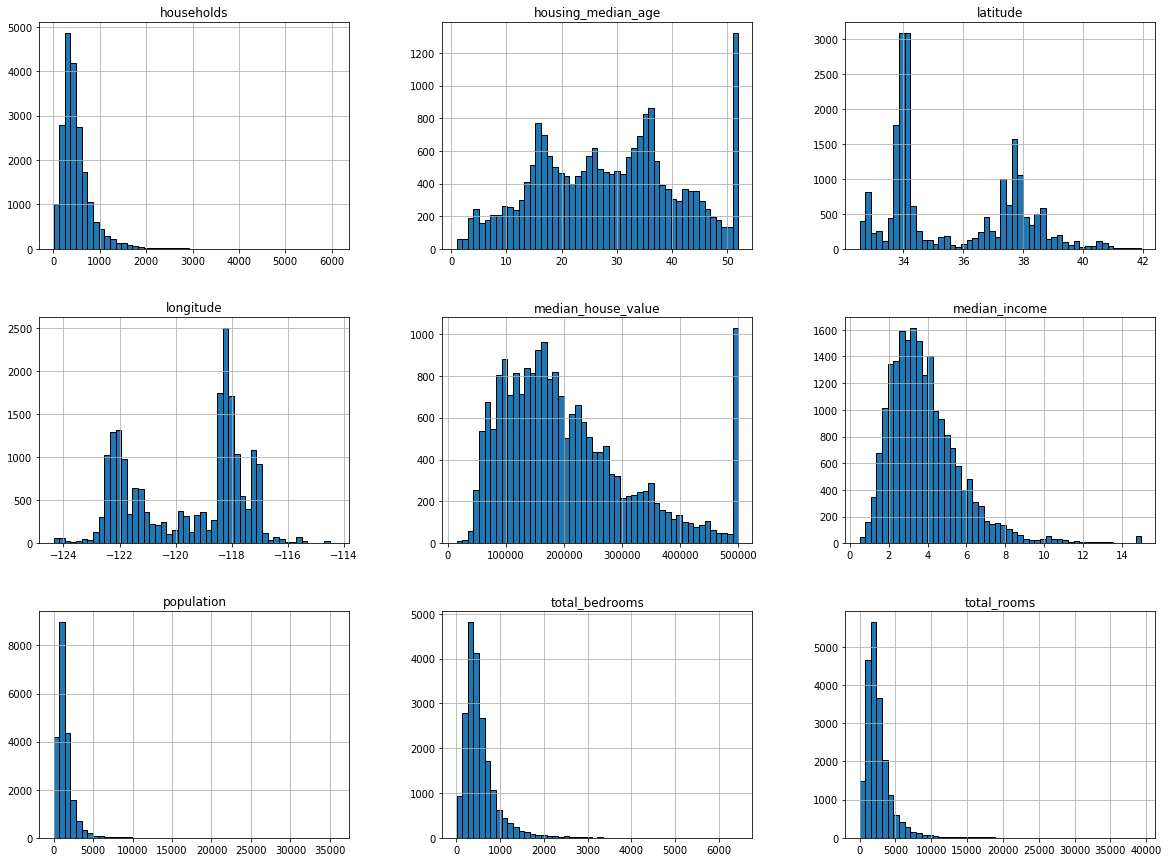

In [17]:
# Using histogram to explore more each numerical attributes 
housing.hist(bins = 50 , figsize =(20,15) , edgecolor = 'black')

# CORELATIONS

In [18]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3CA8C8688>,
      dtype=object)

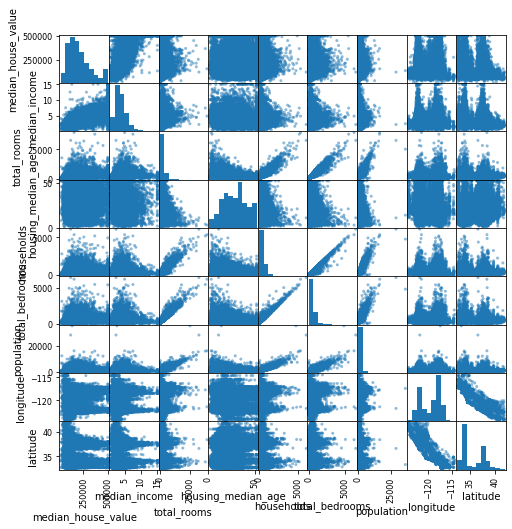

In [20]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value' , 'median_income' , 'total_rooms' , 'housing_median_age' , 'households'
             , 'total_bedrooms' ,'population' , 'longitude' , 'latitude']
scatter_matrix(housing[attributes] , figsize = (8 ,8 ))

# Cleaning Datas

In [21]:
# 1) Remove The Feature that has empty observations
remove_features=housing.drop('total_bedrooms' , axis = 1)
remove_features.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [23]:
# 2) Remove observations that has empty datas along the features
remove_observations=housing.dropna(subset = ['total_bedrooms'])
remove_observations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [24]:
# But these two steps are not too common cause we loss some useful informations , so it is better to use 
# Imputation : which us a way of handling empty or null values by filling with the best guess , the basic 
# implementation is to fill the empty datas with the mean , median or mode

In [25]:
# Imputation :- adjusting empty datas by filling our best guess , the basic implementaion is to fill with
# the mean , median or mode(but work only for numerical attribuites)
housing_mean = housing['total_bedrooms'].mean()
fill_mean=housing['total_bedrooms'].fillna(housing_mean)
housing_median=housing['total_bedrooms'].median()
fill_median=housing['total_bedrooms'].fillna(housing_median)
housing_mode = housing['total_bedrooms'].mode()
fill_mode = housing['total_bedrooms'].fillna(housing_mode)
fill_zero = housing['total_bedrooms'].fillna(0)

In [26]:
print(housing_mean , housing_median , housing_mode)
print(fill_mean.head() , fill_median.head() , fill_mode.head()  , fill_zero.head())

537.8705525375618 435.0 0    280.0
dtype: float64
0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
Name: total_bedrooms, dtype: float64 0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
Name: total_bedrooms, dtype: float64 0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
Name: total_bedrooms, dtype: float64 0     129.0
1    1106.0
2     190.0
3     235.0
4     280.0
Name: total_bedrooms, dtype: float64


In [107]:
# # Give The Feature Matrix And Response Vector
features=housing.drop('ocean_proximity' , axis = 1)
# features = features.drop('median_house_value' , axis = 1)
# response = housing['median_house_value'] # there will be inconsistency in a number of samples

# Imputation Using Scikit Learn

In [108]:
# imputation :- filling the empty datas using the best guess
from sklearn.preprocessing import Imputer
impute=Imputer(strategy = 'median' , axis = 0)
features_old=impute.fit_transform(features)

In [109]:
#  but they imputer class is changed 
from sklearn.impute import SimpleImputer
impute=SimpleImputer(strategy = 'median')
impute.fit(features)
# the imputer computes the median of each attributes and stores in the statistics_ instance variable 
print(impute.statistics_)
features.median().values

[-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05]


array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [110]:
features['longitude'].median()

-118.49

In [111]:
# transform
X=impute.transform(features)
print(X)

[[-1.2223e+02  3.7880e+01  4.1000e+01 ...  1.2600e+02  8.3252e+00
   4.5260e+05]
 [-1.2222e+02  3.7860e+01  2.1000e+01 ...  1.1380e+03  8.3014e+00
   3.5850e+05]
 [-1.2224e+02  3.7850e+01  5.2000e+01 ...  1.7700e+02  7.2574e+00
   3.5210e+05]
 ...
 [-1.2122e+02  3.9430e+01  1.7000e+01 ...  4.3300e+02  1.7000e+00
   9.2300e+04]
 [-1.2132e+02  3.9430e+01  1.8000e+01 ...  3.4900e+02  1.8672e+00
   8.4700e+04]
 [-1.2124e+02  3.9370e+01  1.6000e+01 ...  5.3000e+02  2.3886e+00
   8.9400e+04]]


In [112]:
# changing the plain numpy array to a pandas dataframe
features=pd.DataFrame(X , columns = features.columns)
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [113]:
features.info() # no empty data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


# Working With Duplicated Datas

In [114]:
# since we have no any duplicated datas we will not create a variable to assign for each of our examples

In [115]:
# detecting if there is any duplicated row records
features.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [116]:
# total numbers of duplicated datas
features.duplicated().sum()

0

In [117]:
# duplicated parameters
# 1) keep = 'First' , the default
features.duplicated(keep = 'first').head() # mark duplicates as True exept for the first occurance

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [118]:
# 2) keep = 'last'
features.duplicated(keep = 'last').head() # mark duplicates as True except for the last occurance

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [119]:
# 3) keep = 'False'
features.duplicated(keep = False) # mark all of the duplicates as True

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [120]:
# displaying the duplicated rows
features.loc[features.duplicated(keep = 'first') , :] # there is no any duplicated rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


In [121]:
features.loc[features.duplicated(keep = 'last') , :] # there is no any duplicated rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


In [122]:
features.loc[features.duplicated(keep = False) , :] # there is no any duplicated rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


In [123]:
# Removing Duplicated Rows
features.drop_duplicates(keep = 'first').head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [124]:
features.shape # no removed datas

(20640, 9)

In [125]:
# Detecting Duplciated Columns
features.T.duplicated()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [126]:
# checking the number of duplicated columns
features.T.duplicated().sum()

0

In [127]:
# displaying the value of the duplciated columns
features.loc[: , features.T.duplicated(keep = 'first')].head()

""
0
1
2
3
4


In [128]:
# removing those with a duplicated Columns
features.T.drop_duplicates(keep = 'first')

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
longitude,-122.2300,-122.2200,-122.2400,-122.2500,-122.2500,-122.2500,-122.2500,-122.25,-122.2600,-122.2500,...,-121.3200,-121.4000,-121.450,-121.5300,-121.5600,-121.0900,-121.2100,-121.22,-121.3200,-121.2400
latitude,37.8800,37.8600,37.8500,37.8500,37.8500,37.8500,37.8400,37.84,37.8400,37.8400,...,39.2900,39.3300,39.260,39.1900,39.2700,39.4800,39.4900,39.43,39.4300,39.3700
housing_median_age,41.0000,21.0000,52.0000,52.0000,52.0000,52.0000,52.0000,52.00,42.0000,52.0000,...,11.0000,15.0000,15.000,27.0000,28.0000,25.0000,18.0000,17.00,18.0000,16.0000
total_rooms,880.0000,7099.0000,1467.0000,1274.0000,1627.0000,919.0000,2535.0000,3104.00,2555.0000,3549.0000,...,2640.0000,2655.0000,2319.000,2080.0000,2332.0000,1665.0000,697.0000,2254.00,1860.0000,2785.0000
total_bedrooms,129.0000,1106.0000,190.0000,235.0000,280.0000,213.0000,489.0000,687.00,665.0000,707.0000,...,505.0000,493.0000,416.000,412.0000,395.0000,374.0000,150.0000,485.00,409.0000,616.0000
population,322.0000,2401.0000,496.0000,558.0000,565.0000,413.0000,1094.0000,1157.00,1206.0000,1551.0000,...,1257.0000,1200.0000,1047.000,1082.0000,1041.0000,845.0000,356.0000,1007.00,741.0000,1387.0000
households,126.0000,1138.0000,177.0000,219.0000,259.0000,193.0000,514.0000,647.00,595.0000,714.0000,...,445.0000,432.0000,385.000,382.0000,344.0000,330.0000,114.0000,433.00,349.0000,530.0000
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912,...,3.5673,3.5179,3.125,2.5495,3.7125,1.5603,2.5568,1.70,1.8672,2.3886
median_house_value,452600.0000,358500.0000,352100.0000,341300.0000,342200.0000,269700.0000,299200.0000,241400.00,226700.0000,261100.0000,...,112000.0000,107200.0000,115600.000,98300.0000,116800.0000,78100.0000,77100.0000,92300.00,84700.0000,89400.0000


In [129]:
features.T.drop_duplicates(keep = 'first').shape # no duplicated column

(9, 20640)

In [130]:
# we can transpose it , once we check the duplciated column
features.T.drop_duplicates(keep = 'first').T.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Detecting Outliers

In [131]:
# for each column it computes the Z-score of each value in the column , relative to the column mean
# and the standard deviation

In [132]:
from scipy import stats
import numpy as np
Z_score=np.abs(stats.zscore(features))
Z_score # by looking this output , it is difficult to say which part is the outlier

array([[1.32783522, 1.05254828, 0.98214266, ..., 0.97703285, 2.34476576,
        2.12963148],
       [1.32284391, 1.04318455, 0.60701891, ..., 1.66996103, 2.33223796,
        1.31415614],
       [1.33282653, 1.03850269, 1.85618152, ..., 0.84363692, 1.7826994 ,
        1.25869341],
       ...,
       [0.8237132 , 1.77823747, 0.92485123, ..., 0.17404163, 1.14259331,
        0.99274649],
       [0.87362627, 1.77823747, 0.84539315, ..., 0.39375258, 1.05458292,
        1.05860847],
       [0.83369581, 1.75014627, 1.00430931, ..., 0.07967221, 0.78012947,
        1.01787803]])

In [133]:
threshold = 3 
print(np.where(Z_score > 3)) # two arrays 
# the first array shows the list of row position,the second array shows the column position where we find outliers

(array([   95,    95,   104, ..., 20629, 20629, 20629], dtype=int64), array([4, 6, 4, ..., 4, 5, 6], dtype=int64))


In [134]:
print(Z_score[95 ,4]) # these position has a Z_score value greater than 3 (prone to outlier)

4.626241582839521


In [135]:
features.shape # now lets remove the outliers

(20640, 9)

In [136]:
# how to remove outliers
features = features[(Z_score < 3).all(axis = 1)] # these means in all of the rows of specified columns 
# that satisfy the constraint Z_score < 3
features.shape # 894 outliers out of 20640

(19746, 9)

In [137]:
# we removed 894 datas , but sometimes removing datasets may cost as loss in informations
# if removing outliers affect our project , we will replace them with the best guess(Imputation) 

# Handling Text And Categorical Attributes

In [138]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [139]:
# map using pandas
housing['ocean_proximity'].map({'1H OCEAN':1 , 'INLAND':2 , 'NEAR OCEAN':3 , 'NEAR BAY':4 , 'ISLAND':5})

0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: ocean_proximity, Length: 20640, dtype: float64

In [140]:
# using Scikit-Learn ordinal Encoder Class
category=housing[['ocean_proximity']]
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
ordinal_encoding=encoder.fit_transform(category)
print(ordinal_encoding)
encoder.categories_

[[3.]
 [3.]
 [3.]
 ...
 [1.]
 [1.]
 [1.]]


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [141]:
# But since machine learning algorithm only uderstand numbers , it gives high decisive role for the larger 
# number , one way to avoid these is using OneHotEncoder , means making only one category Hot(1) at a time , 
# while others are cold(0).

In [142]:
# OneHot Encoding using pandas
import pandas as pd # again for make it clear
pd.get_dummies(housing['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [143]:
# Add the encoded data to the dataframe
concat_features=pd.concat([features , pd.get_dummies(housing['ocean_proximity'])] , axis = 1)
concat_features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [144]:
concat_features.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [145]:
# OneHotEncoding using Scikit Learn
category=housing[['ocean_proximity']]
from sklearn.preprocessing import OneHotEncoder
encoding=OneHotEncoder()
encoded_category=encoding.fit_transform(category)
encoded_category # the output is a sparse matrix

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [146]:
encoding.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [147]:
# Sparse Matrix is a matrix where most of the coefficents(>50%) are Zero. This number does not contain 
# informations , just a waste of memory , so it is better to change them to a numpy array , where it only
# stores the dense matrix(the one contains the useful information)

In [148]:
encoded_array=encoded_category.toarray()
encoded_array

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [149]:
# lets join the categorical attribute with the our feature
changed_encoded_array=pd.DataFrame(encoded_array)
changed_encoded_array

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [150]:
features=features.join(changed_encoded_array)
features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


# Feature Scaling

In [151]:
# it is a process of making the independant variables fall out in to a similar scale inorder to compare
# there attributes , cause machine learning algorithms only understands numbers , they will favour the 
# decisive role to the features with more rangeof numbers

In [152]:
# Two ways to Scale our features
from sklearn.preprocessing import MinMaxScaler
scaled_features = MinMaxScaler()
scaled_features.fit(features)
X=scaled_features.transform(features)

In [153]:
X # the transformed scaled features is a plain numpy array , we can change it to a pandas dataframe

array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.        , 1.        ,
        0.        ],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.        , 1.        ,
        0.        ],
       [0.21015936, 0.5642933 , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.        , 0.        ,
        0.        ],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.        , 0.        ,
        0.        ]])

In [154]:
# changing the plain numpy array to a pandas dataframe
features=pd.DataFrame(X , columns = features.columns)
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
0,0.211155,0.567481,0.784314,0.095674,0.071388,0.066251,0.075518,0.864082,0.902266,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.773346,0.620573,0.498027,0.691839,0.861454,0.708247,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.159638,0.105677,0.102388,0.106577,0.746174,0.695051,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.138607,0.130972,0.115265,0.132156,0.567920,0.672783,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.177073,0.156268,0.116719,0.156516,0.369504,0.674638,0.0,0.0,0.0,1.0,0.0


In [155]:
# but Min-Max Scaler can't handle outliers , another method called Standardization
from sklearn.preprocessing import StandardScaler
scaled_features=StandardScaler()
X=scaled_features.fit_transform(features)
X # unlike min-max scaler this does notbound the features in to known range

array([[-1.32040813,  1.0389946 ,  0.96483669, ..., -0.01591477,
         2.82697776, -0.38404367],
       [-1.31541556,  1.02966872, -0.64591639, ..., -0.01591477,
         2.82697776, -0.38404367],
       [-1.32540069,  1.02500578,  1.85075089, ..., -0.01591477,
         2.82697776, -0.38404367],
       ...,
       [-0.81615912,  1.76175006, -0.96806701, ..., -0.01591477,
        -0.35373465, -0.38404367],
       [-0.86608477,  1.76175006, -0.88752936, ..., -0.01591477,
        -0.35373465, -0.38404367],
       [-0.82614425,  1.73377243, -1.04860467, ..., -0.01591477,
        -0.35373465, -0.38404367]])

In [156]:
# changing the plain numpy array to pandas dataframe
new_features=pd.DataFrame(X , columns = features.columns)
new_features.head() # but it is better for me to detect outlierd first and use min-max scaler

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
0,-1.320408,1.038995,0.964837,-1.053400,-1.258623,-1.280730,-1.250056,2.872000,2.266531,-0.887933,-0.68466,-0.015915,2.826978,-0.384044
1,-1.315416,1.029669,-0.645916,3.281952,2.118327,1.409319,2.531830,2.857142,1.416062,-0.887933,-0.68466,-0.015915,2.826978,-0.384044
2,-1.325401,1.025006,1.850751,-0.644194,-1.047779,-1.055589,-1.059467,2.205358,1.358219,-0.887933,-0.68466,-0.015915,2.826978,-0.384044
3,-1.330393,1.025006,1.850751,-0.778737,-0.892239,-0.975366,-0.902511,1.197528,1.260610,-0.887933,-0.68466,-0.015915,2.826978,-0.384044
4,-1.330393,1.025006,1.850751,-0.532656,-0.736699,-0.966309,-0.753029,0.075698,1.268744,-0.887933,-0.68466,-0.015915,2.826978,-0.384044


In [157]:
features.head() # i will use the feature scaled by using MinMax Scaler

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,0,1,2,3,4
0,0.211155,0.567481,0.784314,0.095674,0.071388,0.066251,0.075518,0.864082,0.902266,0.0,0.0,0.0,1.0,0.0
1,0.212151,0.565356,0.392157,0.773346,0.620573,0.498027,0.691839,0.861454,0.708247,0.0,0.0,0.0,1.0,0.0
2,0.210159,0.564293,1.000000,0.159638,0.105677,0.102388,0.106577,0.746174,0.695051,0.0,0.0,0.0,1.0,0.0
3,0.209163,0.564293,1.000000,0.138607,0.130972,0.115265,0.132156,0.567920,0.672783,0.0,0.0,0.0,1.0,0.0
4,0.209163,0.564293,1.000000,0.177073,0.156268,0.116719,0.156516,0.369504,0.674638,0.0,0.0,0.0,1.0,0.0


In [159]:
# But it is better to apply feature scaling after we split our dataset
X = features.drop('median_house_value' , axis = 1)
y=features['median_house_value']

# Split the dataset in to a training and testing set

In [161]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test=train_test_split(X , y , test_size = 0.2 , random_state = 0)
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(15796, 13) (3950, 13)
(15796,) (3950,)


In [165]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test  = scale.fit_transform(X_test)
print(X_train)
print(X_test)

[[0.62250996 0.15621679 0.43137255 ... 0.         0.         0.        ]
 [0.71215139 0.16896918 0.25490196 ... 0.         0.         0.        ]
 [0.21713147 0.78427205 0.29411765 ... 0.         0.         0.        ]
 ...
 [0.64641434 0.1445271  0.31372549 ... 0.         0.         0.        ]
 [0.63545817 0.13283741 0.64705882 ... 0.         0.         0.        ]
 [0.53087649 0.30605739 0.76470588 ... 0.         0.         0.        ]]
[[0.51446281 0.18191489 0.56862745 ... 0.         0.         1.        ]
 [0.73243802 0.06382979 0.29411765 ... 0.         0.         0.        ]
 [0.61053719 0.17340426 0.84313725 ... 0.         0.         0.        ]
 ...
 [0.6177686  0.15319149 0.74509804 ... 0.         0.         0.        ]
 [0.62293388 0.14787234 0.80392157 ... 0.         0.         0.        ]
 [0.37809917 0.27978723 0.29411765 ... 0.         0.         0.        ]]


In [168]:
# changing the numpy X_train to a pandas dataframe
X_train=pd.DataFrame(X_train , columns = X.columns)
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,0,1,2,3,4
0,0.622510,0.156217,0.431373,0.187704,0.325028,0.276843,0.328867,0.092379,1.0,0.0,0.0,0.0,0.0
1,0.712151,0.168969,0.254902,0.435579,0.401472,0.312773,0.403776,0.321757,0.0,1.0,0.0,0.0,0.0
2,0.217131,0.784272,0.294118,0.170482,0.172140,0.134787,0.173569,0.155021,0.0,1.0,0.0,0.0,0.0
3,0.373506,0.511158,0.647059,0.187486,0.177803,0.187124,0.190621,0.217023,0.0,1.0,0.0,0.0,0.0
4,0.227092,0.579171,0.529412,0.360584,0.323896,0.375493,0.362363,0.446125,0.0,0.0,0.0,1.0,0.0


In [169]:
# changing the numpy X_test in to a pandas dataframe
X_test=pd.DataFrame(X_test , columns = X.columns)
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,0,1,2,3,4
0,0.514463,0.181915,0.568627,0.319834,0.463442,0.339737,0.458462,0.240465,0.0,0.0,0.0,0.0,1.0
1,0.732438,0.063830,0.294118,0.121275,0.109674,0.156609,0.106462,0.502482,1.0,0.0,0.0,0.0,0.0
2,0.610537,0.173404,0.843137,0.172034,0.217098,0.172061,0.206154,0.321355,1.0,0.0,0.0,0.0,0.0
3,0.989669,0.111702,0.529412,0.181203,0.179415,0.137398,0.154462,0.273187,0.0,1.0,0.0,0.0,0.0
4,0.180785,0.554255,1.000000,0.199432,0.187289,0.210274,0.204308,0.403320,0.0,0.0,0.0,1.0,0.0
